# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview



In [4]:
# Checking the number of mice.
unique_mice_count = merged_data['Mouse ID'].nunique()
print(f"Number of unique mice IDs: {unique_mice_count}")



Number of unique mice IDs: 249


In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicated_mice = merged_data[merged_data.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
print("Duplicated mice data:")
print(duplicated_mice)
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
clean_data = merged_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
updated_unique_mice_count = clean_data['Mouse ID'].nunique()
print(f"Updated number of unique mice IDs: {updated_unique_mice_count}")

Duplicated mice data:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911      

In [8]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_id = duplicated_mice['Mouse ID'].unique()[0]
duplicate_mouse_data = merged_data[merged_data['Mouse ID'] == duplicate_mouse_id]
print(f"Data for duplicate mouse ID {duplicate_mouse_id}:")
print(duplicate_mouse_data)


Data for duplicate mouse ID g989:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Fem

In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_data = merged_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')


In [13]:
# Checking the number of mice in the clean DataFrame.
print(f"Updated number of unique mice IDs in the clean DataFrame: {updated_unique_mice_count}")

Updated number of unique mice IDs in the clean DataFrame: 249


## Summary Statistics

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
summary_stats = clean_data.groupby('Drug Regimen').agg(
    mean_tumor=('Tumor Volume (mm3)', 'mean'),
    median_tumor=('Tumor Volume (mm3)', 'median'),
    variance_tumor=('Tumor Volume (mm3)', 'var'),
    stddev_tumor=('Tumor Volume (mm3)', 'std'),
    sem_tumor=('Tumor Volume (mm3)', 'sem')
# Assemble the resulting series into a single summary DataFrame.
    print("Summary statistics for each drug regimen:")
print(summary_stats)


SyntaxError: '(' was never closed (553970768.py, line 4)

In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

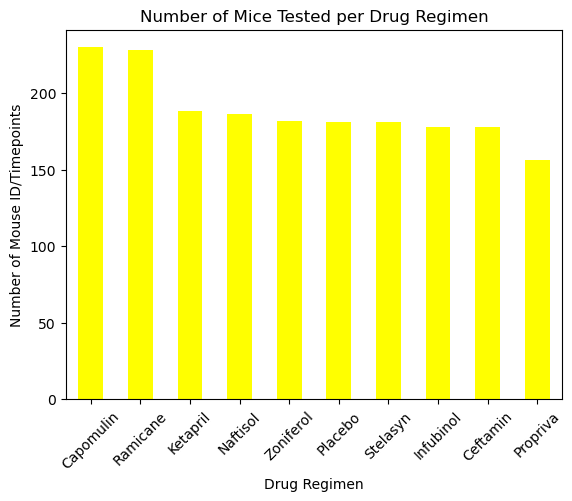

In [18]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = clean_data['Drug Regimen'].value_counts()
regimen_counts.plot(kind='bar', color='yellow', title="Number of Mice Tested per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse ID/Timepoints")
plt.xticks(rotation=45)
plt.show()


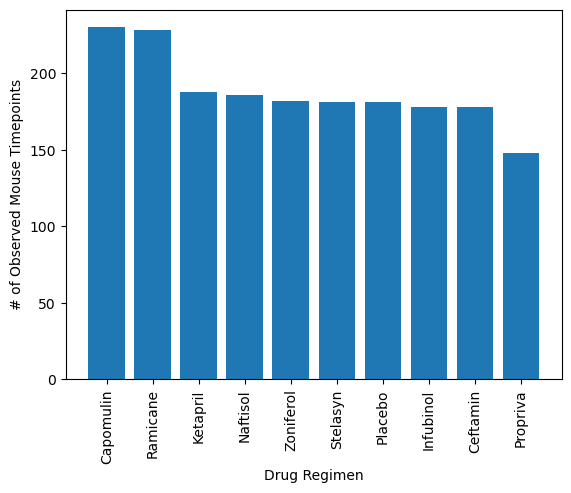

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


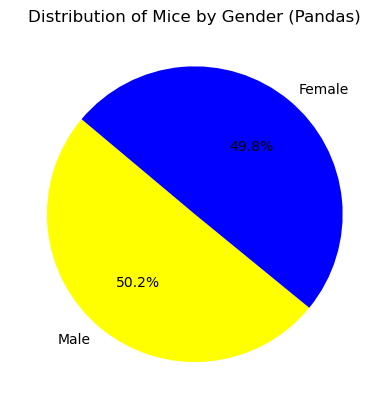

In [24]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
import matplotlib.pyplot as plt
unique_mice_gender = clean_data.drop_duplicates(subset='Mouse ID')['Sex'].value_counts()
# Get the unique mice with their gender
unique_mice_gender.plot(kind='pie', autopct='%1.1f%%', colors=['yellow', 'blue'], startangle=140)
plt.title("Distribution of Mice by Gender (Pandas)")
plt.ylabel('')  # Ocultar la etiqueta del eje Y para que se vea más limpio
plt.show()

# Make the pie chart


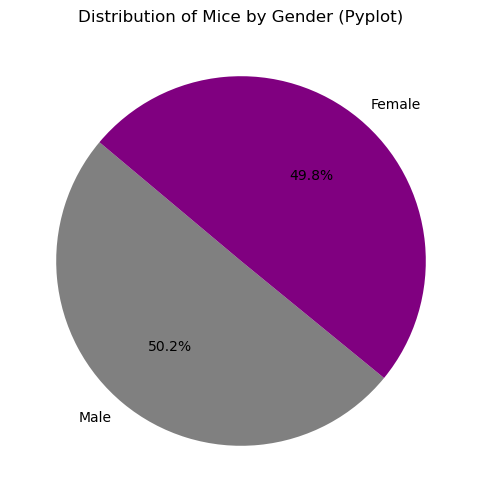

In [23]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
unique_mice_gender = clean_data.drop_duplicates(subset='Mouse ID')['Sex'].value_counts()
# Get the unique mice with their gender
plt.figure(figsize=(6, 6))
plt.pie(unique_mice_gender, labels=unique_mice_gender.index, autopct='%1.1f%%', colors=['grey', 'purple'], startangle=140)
plt.title("Distribution of Mice by Gender (Pyplot)")
plt.show()

# Make the pie chart


## Quartiles, Outliers and Boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
filtered_treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = clean_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
print("Last timepoint for each mouse:")
print(last_timepoints.head())

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_data = pd.merge(last_timepoints, clean_data, on=['Mouse ID', 'Timepoint'], how='left')
print("Merged data with final tumor volume for each mouse at the last timepoint:")
print(final_tumor_data.head())

# Filter the merged data to include only the specified treatment regimens
filtered_final_tumor_data = final_tumor_data[final_tumor_data['Drug Regimen'].isin(filtered_treatments)]
print("Filtered data for selected treatment regimens (Capomulin, Ramicane, Infubinol, Ceftamin):")
print(filtered_final_tumor_data.head())


Last timepoint for each mouse:
  Mouse ID  Timepoint
0     a203         45
1     a251         45
2     a262         45
3     a275         45
4     a366         30
Merged data with final tumor volume for each mouse at the last timepoint:
  Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0     a203         45    Infubinol  Female          20          23   
1     a251         45    Infubinol  Female          21          25   
2     a262         45      Placebo  Female          17          29   
3     a275         45     Ceftamin  Female          20          28   
4     a366         30     Stelasyn  Female          16          29   

   Tumor Volume (mm3)  Metastatic Sites  
0           67.973419                 2  
1           65.525743                 1  
2           70.717621                 4  
3           62.999356                 3  
4           63.440686                 1  
Filtered data for selected treatment regimens (Capomulin, Ramicane, Infubinol, Ceftamin):


In [28]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_data = final_tumor_data[final_tumor_data['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    
    # add subset
    tumor_volumes.append(drug_data)
    
    # Determine outliers using upper and lower bounds
    quartiles = drug_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Identify outliers
    outliers = drug_data[(drug_data < lower_bound) | (drug_data > upper_bound)]
    
    # Print results for each drug
    print(f"{drug} IQR: {iqr}")
    print(f"{drug} outliers: {outliers.values}")


Capomulin IQR: 7.781863460000004
Capomulin outliers: []
Ramicane IQR: 9.098536719999998
Ramicane outliers: []
Infubinol IQR: 11.477135160000003
Infubinol outliers: [36.3213458]
Ceftamin IQR: 15.577752179999997
Ceftamin outliers: []


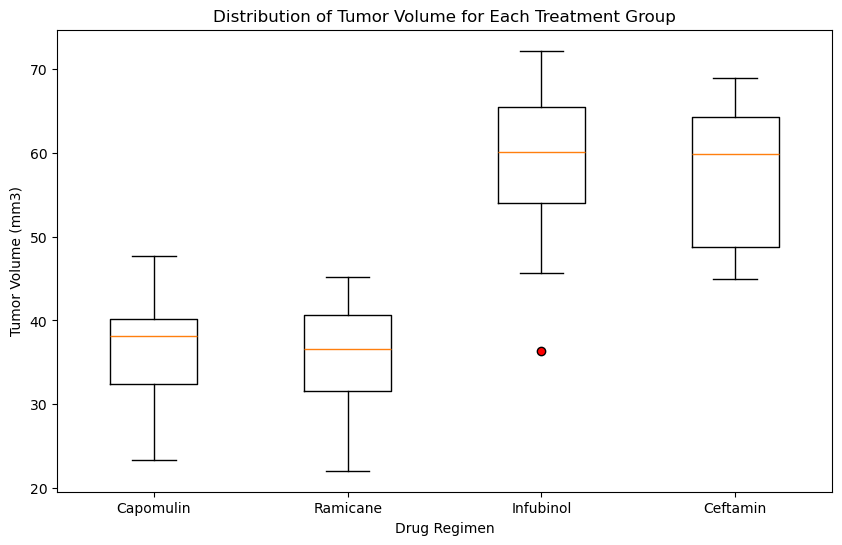

In [29]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
import matplotlib.pyplot as plt

# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volumes, labels=treatment_list, flierprops=dict(markerfacecolor='r', marker='o'))
plt.title("Distribution of Tumor Volume for Each Treatment Group")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.show()



## Line and Scatter Plots

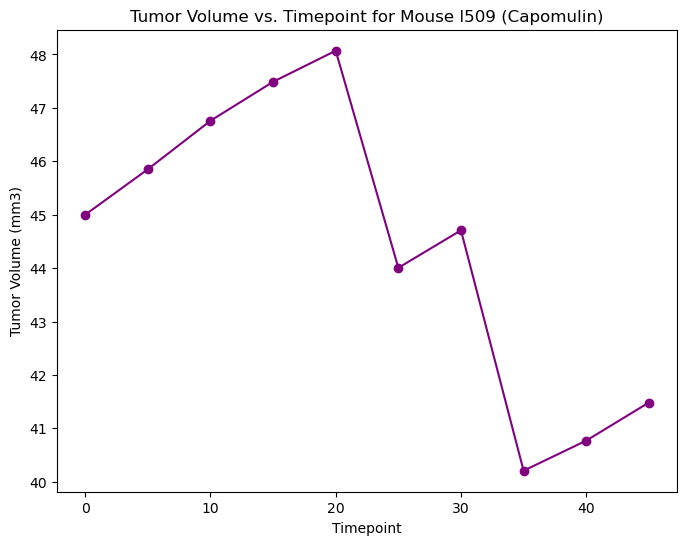

In [30]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'l509'
mouse_data = clean_data[(clean_data['Mouse ID'] == mouse_id) & (clean_data['Drug Regimen'] == 'Capomulin')]
plt.figure(figsize=(8, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', color='purple')
plt.title(f"Tumor Volume vs. Timepoint for Mouse {mouse_id} (Capomulin)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

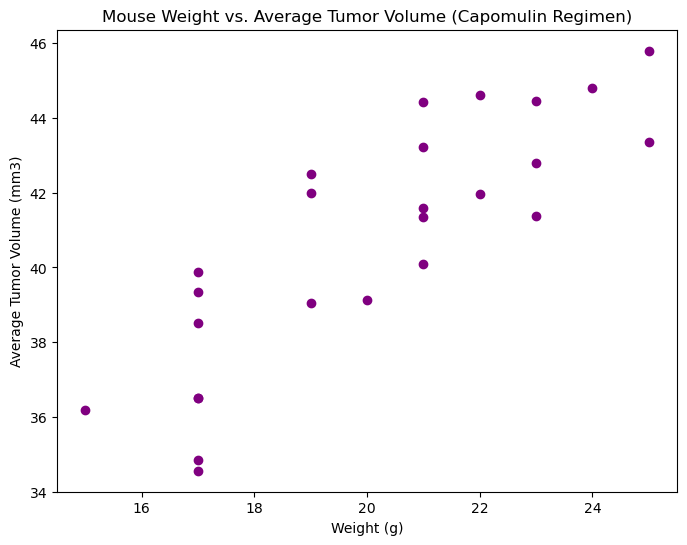

In [31]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID').agg(
    avg_volume=('Tumor Volume (mm3)', 'mean'),
    weight=('Weight (g)', 'mean')
).reset_index()
plt.figure(figsize=(8, 6))
plt.scatter(average_tumor_volume['weight'], average_tumor_volume['avg_volume'], color='purple')
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

Correlation coefficient between mouse weight and average tumor volume: 0.8419363424694721


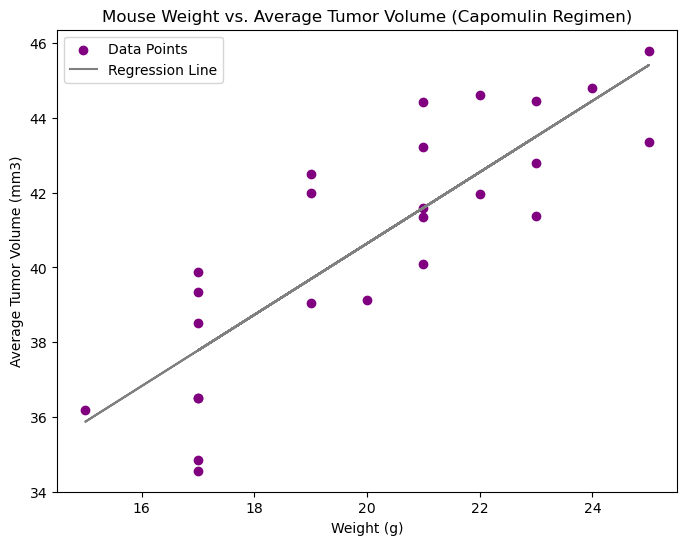

In [32]:
# Calculate the correlation coefficient and a linear regression model
from scipy.stats import pearsonr, linregress
correlation, _ = pearsonr(average_tumor_volume['weight'], average_tumor_volume['avg_volume'])
print(f"Correlation coefficient between mouse weight and average tumor volume: {correlation}")
slope, intercept, r_value, p_value, std_err = linregress(average_tumor_volume['weight'], average_tumor_volume['avg_volume'])

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
regression_line = slope * average_tumor_volume['weight'] + intercept
plt.figure(figsize=(8, 6))
plt.scatter(average_tumor_volume['weight'], average_tumor_volume['avg_volume'], color='purple', label='Data Points')  # Puntos morados
plt.plot(average_tumor_volume['weight'], regression_line, color='gray', label='Regression Line')  # Línea gris
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.legend()
plt.show()